In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Einlesen des Datensatzes

In [2]:
dataset = pd.read_csv("simpson_covid_dataset.csv")
# Remove unnamed column, since first column doesn't have a header.
# Dataset from: https://github.com/Juliusvk/Covid19-age-related-causal-effects/tree/master/datasets/Different_countries_latest
dataset = dataset.loc[:, ~dataset.columns.str.contains("Unnamed")]
dataset

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,Argentina,28 May2020,0-9,1002,0
1,Argentina,28 May2020,10-19,1080,1
2,Argentina,28 May2020,20-29,2813,1
3,Argentina,28 May2020,30-39,3142,9
4,Argentina,28 May2020,40-49,2508,24
...,...,...,...,...,...
103,South Korea,25 May2020,40-49,1481,3
104,South Korea,25 May2020,50-59,1987,15
105,South Korea,25 May2020,60-69,1375,39
106,South Korea,25 May2020,70-79,719,78


In [3]:
dataset_italy = dataset.loc[dataset["Country"] == "Italy"].reset_index(drop=True)
dataset_italy

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,Italy,26 May2020,0-9,1919,4
1,Italy,26 May2020,10-19,3442,0
2,Italy,26 May2020,20-29,12933,12
3,Italy,26 May2020,30-39,17934,62
4,Italy,26 May2020,40-49,29942,273
5,Italy,26 May2020,50-59,41435,1109
6,Italy,26 May2020,60-69,30880,3259
7,Italy,26 May2020,70-79,33141,8562
8,Italy,26 May2020,80+,59134,18395


In [4]:
dataset_china = dataset.loc[dataset["Country"] == "China"].reset_index(drop=True)
dataset_china

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,China,17 February2020,0-9,416,0
1,China,17 February2020,10-19,549,1
2,China,17 February2020,20-29,3619,7
3,China,17 February2020,30-39,7600,18
4,China,17 February2020,40-49,8571,38
5,China,17 February2020,50-59,10008,130
6,China,17 February2020,60-69,8583,309
7,China,17 February2020,70-79,3918,312
8,China,17 February2020,80+,1408,208


# Todesrate und Zeile für "total" hinzufügen

In [5]:
def apply_deathrate(df):
    return_df = df.copy()
    return_df["Deathrate"] = return_df.apply( 
        lambda x: np.around(x["Confirmed fatalities"] / x["Confirmed cases"], decimals=3) * 100 , axis=1)
    return return_df

In [6]:
df_deathrate_italy = apply_deathrate(dataset_italy)
df_deathrate_italy

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Deathrate
0,Italy,26 May2020,0-9,1919,4,0.2
1,Italy,26 May2020,10-19,3442,0,0.0
2,Italy,26 May2020,20-29,12933,12,0.1
3,Italy,26 May2020,30-39,17934,62,0.3
4,Italy,26 May2020,40-49,29942,273,0.9
5,Italy,26 May2020,50-59,41435,1109,2.7
6,Italy,26 May2020,60-69,30880,3259,10.6
7,Italy,26 May2020,70-79,33141,8562,25.8
8,Italy,26 May2020,80+,59134,18395,31.1


In [7]:
df_deathrate_china = apply_deathrate(dataset_china)
df_deathrate_china

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Deathrate
0,China,17 February2020,0-9,416,0,0.0
1,China,17 February2020,10-19,549,1,0.2
2,China,17 February2020,20-29,3619,7,0.2
3,China,17 February2020,30-39,7600,18,0.2
4,China,17 February2020,40-49,8571,38,0.4
5,China,17 February2020,50-59,10008,130,1.3
6,China,17 February2020,60-69,8583,309,3.6
7,China,17 February2020,70-79,3918,312,8.0
8,China,17 February2020,80+,1408,208,14.8


In [8]:
def add_total_deathrate(df):
    total_cases = df["Confirmed cases"].sum()
    total_deaths = df["Confirmed fatalities"].sum()
    
    last_entry = df.iloc[-1]
    total_deathrate = np.around(total_deaths / total_cases, decimals=3) * 100
    df.loc[len(df.index)] = [last_entry["Country"], last_entry["Date of reporting"], "total", 
                                                     total_cases, total_deaths, total_deathrate]

In [9]:
add_total_deathrate(df_deathrate_italy)
df_deathrate_italy

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Deathrate
0,Italy,26 May2020,0-9,1919,4,0.2
1,Italy,26 May2020,10-19,3442,0,0.0
2,Italy,26 May2020,20-29,12933,12,0.1
3,Italy,26 May2020,30-39,17934,62,0.3
4,Italy,26 May2020,40-49,29942,273,0.9
5,Italy,26 May2020,50-59,41435,1109,2.7
6,Italy,26 May2020,60-69,30880,3259,10.6
7,Italy,26 May2020,70-79,33141,8562,25.8
8,Italy,26 May2020,80+,59134,18395,31.1
9,Italy,26 May2020,total,230760,31676,13.7


In [10]:
add_total_deathrate(df_deathrate_china)
df_deathrate_china

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Deathrate
0,China,17 February2020,0-9,416,0,0.0
1,China,17 February2020,10-19,549,1,0.2
2,China,17 February2020,20-29,3619,7,0.2
3,China,17 February2020,30-39,7600,18,0.2
4,China,17 February2020,40-49,8571,38,0.4
5,China,17 February2020,50-59,10008,130,1.3
6,China,17 February2020,60-69,8583,309,3.6
7,China,17 February2020,70-79,3918,312,8.0
8,China,17 February2020,80+,1408,208,14.8
9,China,17 February2020,total,44672,1023,2.3


# Plotten der ersten Abbildung

In [11]:
def bar_plot_italy_china_values(it_values, china_values, labels, title=None):
    xv = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=[10, 8])
    
    
    ax.bar(xv - width/2, china_values, width, label="China")
    ax.bar(xv + width/2, it_values, width, label="Italien")
    ax.set_xticks(xv, labels)
    ax.legend()
    if title: ax.set_title(title)
    plt.tight_layout()
    plt.show()

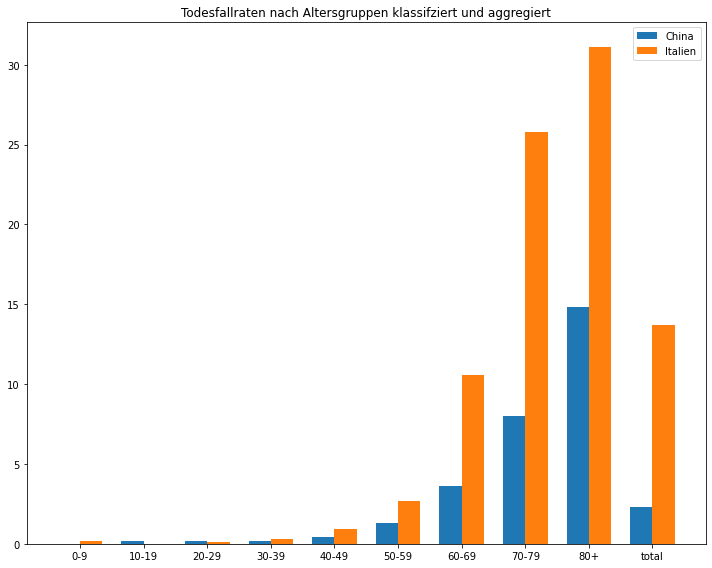

In [12]:
bar_plot_italy_china_values(df_deathrate_italy["Deathrate"], df_deathrate_china["Deathrate"],  df_deathrate_china["Age group"],
                            title="Todesfallraten nach Altersgruppen klassifziert und aggregiert")

# Plotten der zweiten Abbildung

In [13]:
def apply_share_case_per_age_group(df):
    return_df = df.copy()
    total_cases = df["Confirmed cases"].sum()
    return_df["Share of Cases"] = return_df.apply( 
        lambda x: np.around(x["Confirmed cases"] / total_cases, decimals=3) * 100 , axis=1)
    return return_df

In [14]:
cases_share_italy = apply_share_case_per_age_group(dataset_italy)
cases_share_italy

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Share of Cases
0,Italy,26 May2020,0-9,1919,4,0.8
1,Italy,26 May2020,10-19,3442,0,1.5
2,Italy,26 May2020,20-29,12933,12,5.6
3,Italy,26 May2020,30-39,17934,62,7.8
4,Italy,26 May2020,40-49,29942,273,13.0
5,Italy,26 May2020,50-59,41435,1109,18.0
6,Italy,26 May2020,60-69,30880,3259,13.4
7,Italy,26 May2020,70-79,33141,8562,14.4
8,Italy,26 May2020,80+,59134,18395,25.6


In [15]:
cases_share_china = apply_share_case_per_age_group(dataset_china)
cases_share_china

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities,Share of Cases
0,China,17 February2020,0-9,416,0,0.9
1,China,17 February2020,10-19,549,1,1.2
2,China,17 February2020,20-29,3619,7,8.1
3,China,17 February2020,30-39,7600,18,17.0
4,China,17 February2020,40-49,8571,38,19.2
5,China,17 February2020,50-59,10008,130,22.4
6,China,17 February2020,60-69,8583,309,19.2
7,China,17 February2020,70-79,3918,312,8.8
8,China,17 February2020,80+,1408,208,3.2


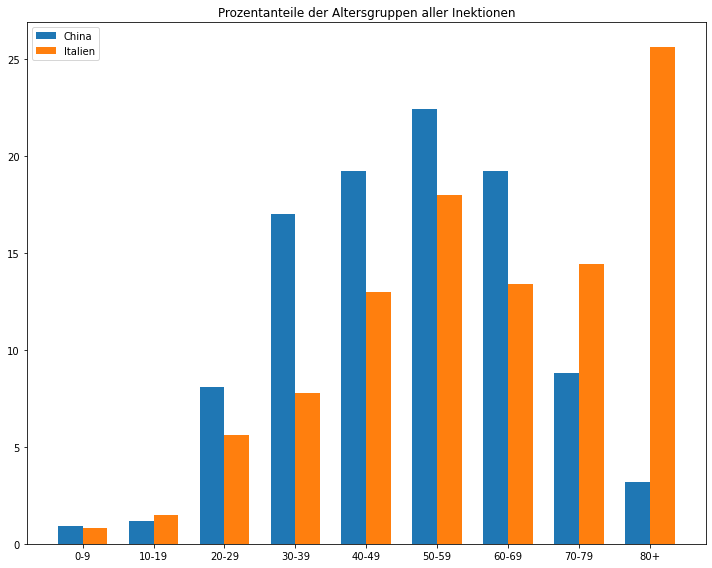

In [16]:
bar_plot_italy_china_values(cases_share_italy["Share of Cases"], cases_share_china["Share of Cases"], 
                            cases_share_china["Age group"], title="Prozentanteile der Altersgruppen aller Inektionen")

# Plotten der dritten Abbildung (Daten hardcodet, da keine Quellenrecherche erforderlich)

In [17]:
it_age_share = {
    "0-9"   : 8.3,
    "10-19" : 9.5,
    "20-29" : 10.1,
    "30-39" : 11.6,
    "40-49" : 14.9,
    "50-59" : 15.8,
    "60-69" : 12.4,
    "70-79" : 10,
    "80+"   : 7.5
    
}

df_age_share_italy = pd.DataFrame(it_age_share.items(), columns=["Age group", "Share"])
df_age_share_italy

,Age group,Share
0,0-9,8.3
1,10-19,9.5
2,20-29,10.1
3,30-39,11.6
4,40-49,14.9
5,50-59,15.8
6,60-69,12.4
7,70-79,10.0
8,80+,7.5


In [18]:
china_age_share = {
    "0-9"   : 11.9,
    "10-19" : 11.6,
    "20-29" : 12.9,
    "30-39" : 15.9,
    "40-49" : 15,
    "50-59" : 15.4,
    "60-69" : 10.5,
    "70-79" : 5,
    "80+"   : 1.8
    
}

df_age_share_china = pd.DataFrame(china_age_share.items(), columns=["Age group", "Share"])
df_age_share_china

,Age group,Share
0,0-9,11.9
1,10-19,11.6
2,20-29,12.9
3,30-39,15.9
4,40-49,15.0
5,50-59,15.4
6,60-69,10.5
7,70-79,5.0
8,80+,1.8


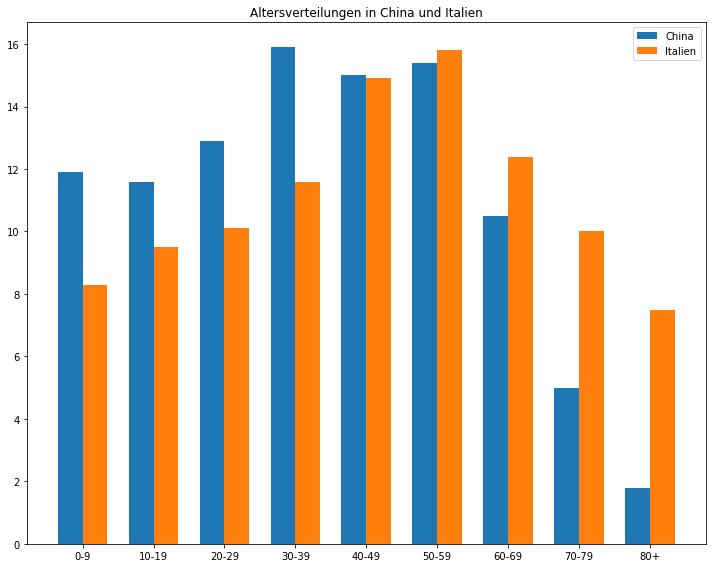

In [19]:
bar_plot_italy_china_values(df_age_share_italy["Share"], df_age_share_china["Share"], 
                            cases_share_china["Age group"], title="Altersverteilungen in China und Italien")

# Begründung des Vorliegens eines Simpson Paradoxons:
Die Betrachtung der gesamten Totenfälle steht konträr zu den der Betrachtung der Todesfälle pro Altersgruppe je Land (Italien und China). Dies ist im Endeffekt darauf zurückzuführen, dass der Anteil der älteren Bevölkerung (also ab 60+/70+) in Italien deutlich höher ist als in China (siehe Abbildung 3). Dies schlägt sich auch auf die Anzahl der verstorbenen Fälle an Covid-19 nieder. Es wird also kein Bezug zur Altersverteilung der beiden Länder genommen, sodass ein direkter Vergleich der Anteil an Todesfällen je Altersklasse aufgrund dieser verschiedenen Verteilung und daraus resultierenden anderen Gewichsverteilung in stochastischen Modellierungen nicht gerecht wird. 